# Applications of 1D Discrete Fourier Transform

In [34]:
%matplotlib inline
import numpy as np
import scipy as sc
from scipy import signal
from matplotlib import pyplot as plt

# Harmonic function



## Defining a test function 

To demonstrate some possible applications of the 1D Discrete Fourier transform a test function $g(t)$ is defined. The test function is first defined as a continuous function from which a discrete version will be derived.

Properties of the test function:

1. Superposition of several harmonic functions

2. Duration of test function shall be an integer of the duration a the harmonic with the lowest frequency

3. A higly oversampled discrete version of test function $g(t)$ is used


---

The continous function is composed of a DC component $A_0$ and three complex harmonics with amplitudes $A_1$, $A_2$, $A_3$ and frequencies $f_1$, $f_2$, $f_3$. $\tau$ denotes a time shift.

$$
g(t-\tau) = A_0 + A_1 \cdot \exp\left(j \cdot 2\pi \cdot f_1 \cdot \left(t-\tau\right)\right) + A_2 \cdot \exp\left(j \cdot 2\pi \cdot f_2 \cdot \left(t-\tau\right)\right) + A_3 \cdot \exp\left(j \cdot 2\pi \cdot f_3 \cdot \left(t-\tau\right)\right) 
$$

Frequencies $f_1$, $f_2$, $f_3$ shall be related to a fundamental frequency $f_s$ (sometimes referred to a frequency increment) by integer multiples $m_1$, $m_2$, $m_3$.

$$
f_1 = m_1 \cdot f_s\\
f_2 = m_2 \cdot f_s\\
f_3 = m_3 \cdot f_s\\
$$

$$
g(t) = A_0 + A_1 \cdot \exp\left(j \cdot 2\pi \cdot m_1 \cdot f_s \cdot \left(t-\tau\right)\right) + A_2 \cdot \exp\left(j \cdot 2\pi \cdot m_2 \cdot f_s \cdot \left(t-\tau\right)\right) + A_3 \cdot \exp\left(j \cdot 2\pi \cdot m_3 \cdot f_s \cdot \left(t-\tau\right)\right) 
$$

$$
g(t) = A_0 + A_1 \cdot \exp\left(-j \cdot 2\pi \cdot m_1 \cdot f_s \cdot \tau\right) \cdot \exp\left(j \cdot 2\pi \cdot m_1 \cdot f_s \cdot t\right) + A_2 \cdot \exp\left(-j \cdot 2\pi \cdot m_2 \cdot f_s \cdot \tau\right) \cdot \exp\left(j \cdot 2\pi \cdot m_2 \cdot f_s \cdot t\right) + A_3 \cdot \exp\left(-j \cdot 2\pi \cdot m_3 \cdot f_s \cdot \tau\right) \cdot \exp\left(j \cdot 2\pi \cdot m_3 \cdot f_s \cdot t\right) 
$$

Function $g(t)$ is periodc with period $T_p=\frac{1}{f_s}$. The continous function $g(t)$ is converted into a time discrete  version by evaluating/sampling $g(t)$ on timing instants $k \cdot t_s$. 

$t_s$ denotes the sampling duration. $k$ are integer values running from $0, ..., N-1$.

Time shift $\tau$ is expressed by $a \cdot t_s$.

A period $T_p$ of $g(t)$ consists of $N$ samples. Hence the sampling duration $t_s$ is therfore $t_s = \frac{T_p}{N}$ .

With these definition we get an equation for the time discrete function $g(k \cdot t_s)$:

$$
g(k \cdot t_s) = A_0 + A_1 \cdot \exp\left(-j \cdot 2\pi \cdot m_1 \cdot f_s \cdot t_s \cdot a\right) \cdot \exp\left(j \cdot 2\pi \cdot m_1 \cdot f_s \cdot k \cdot t_s\right) + A_2 \cdot \exp\left(-j \cdot 2\pi \cdot m_2 \cdot f_s \cdot t_s \cdot a\right) \cdot \exp\left(j \cdot 2\pi \cdot m_2 \cdot f_s \cdot k \cdot t_s\right) + A_3 \cdot \exp\left(-j \cdot 2\pi \cdot m_3 \cdot f_s \cdot t_s \cdot a\right) \cdot \exp\left(j \cdot 2\pi \cdot m_3 \cdot f_s \cdot k \cdot t_s\right) 
$$


Using

$$
t_s \cdot f_s = \frac{1}{N}
$$

$$
g(k \cdot t_s) = A_0 + A_1 \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot m_1 \cdot a\right) \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot m_1 \cdot k \right) + A_2 \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot m_2 \cdot a\right) \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot m_2 \cdot k\right) + A_3 \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot m_3 \cdot a\right) \cdot \exp\left(j \cdot \frac{2\pi}{N} \cdot m_3 \cdot k\right) 
$$


Finally the choice of $N$ depends on the highest frequency $m_3 \cdot f_s$. With an integer oversampling factor $osr \ge 2$ , the number of samples $N$ is choosen like this:

$$
N = osr \cdot m_3
$$

### Note

It is fairly instructive to see how a time shift by $\tau = a \cdot t_s$ affects the Fourier coefficients $A_1$, $A_2$ and $A_3$. They are just multiplied by a complex exponential $\exp\left(-j \cdot \frac{2\pi}{N} \cdot m_x \cdot a\right) $ (where $m_x$ denotes the frequency index. Time shift $\tau$ need not be an integer multiple of the sampling duration $t_s$. Any real value $a$ will do.

## A practical example

$$
A_0 = 1.5; A_1 = 1.0; A_2 = 4.0; A_3 = 6.0\\
m_1 = 5; m_2 = 15; m_3 = 42\\
\tau = a \cdot t_s = 0 \\
osr = 10 \to N = 420
$$

In [35]:
# the definition
def tstFunc(A_0, A_1, A_2, A_3, m_1, m_2, m_3, osr, a):
    N = osr*m_3
    kv = np.arange(0, N)
    gfunc = A_0 + A_1*np.exp(-2j*np.pi*m_1*a/N)*np.exp(2j*np.pi*m_1*kv/N) +\
    A_2 * np.exp(-2j*np.pi*m_2*a/N) * np.exp(2j*np.pi*m_2*kv/N) +\
    A_3 * np.exp(-2j*np.pi*m_3*a/N) * np.exp(2j*np.pi*m_3*kv/N)
    return gfunc, kv, N

In [36]:
# function evaluation
A_0 = 1.5
A_1 = 1.0
A_2 = 4.0
A_3 = 6.0
m_1 = 5
m_2 = 15
m_3 = 42
a = 0
osr = 10

gfunc, kv, N = tstFunc(A_0, A_1, A_2, A_3, m_1, m_2, m_3, osr, a)

---

The graphics below shows the real- and imaginary part in two subplots.

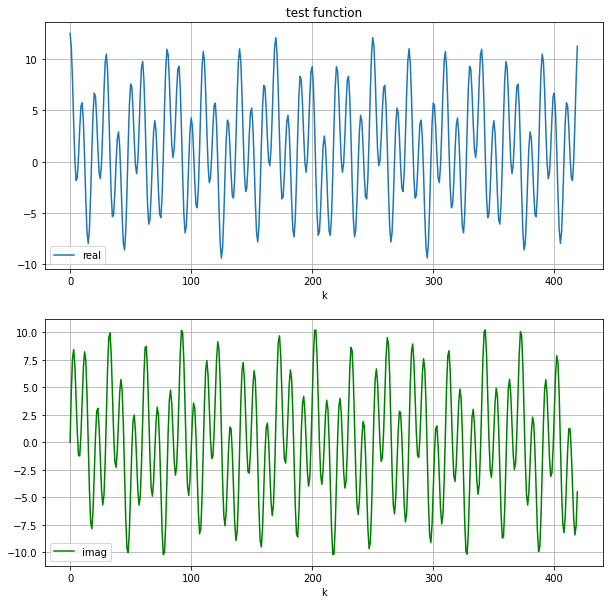

In [37]:
# graphics
fig1 = plt.figure(1, figsize=[10, 10])
ax_f11 = fig1.add_subplot(2, 1, 1)
ax_f11.plot(kv, gfunc.real, label="real")
ax_f11.legend(loc='lower left')
ax_f11.grid(True)
ax_f11.set_xlabel('k')
ax_f11.set_title('test function')

ax_f12 = fig1.add_subplot(2, 1, 2)
ax_f12.plot(kv, gfunc.imag, color='g', label="imag")
ax_f12.legend(loc='lower left')
ax_f12.grid(True)
ax_f12.set_xlabel('k');

## Applying the DFT

Function `fft` of libraries `Scipy/Numpy`implements the DFT according to this formula:

$$
A_n = \sum_{k=0}^{N-1} a_k \cdot \exp\left(-j \cdot \frac{2\pi}{N} \cdot n \cdot k\right)
$$

To get the actual amplitudes $A_0, A_1, A_2, A_1$ a correction factor of $\frac{1}{N}$ must be applied.

See example below.

In [38]:
# note the correction factor (1/N)
Gfft = (1/N)*np.fft.fft(gfunc)

In the plot below only the magnitude of the DFT is displayed. Amplitudes $A_0, A_1, A_2, A_1$ are accurately reproduce. 

A subplot below displays a zoomed version just to show that amplitudes occur at their correct *frequency points* $m_1, m_2, m_3$

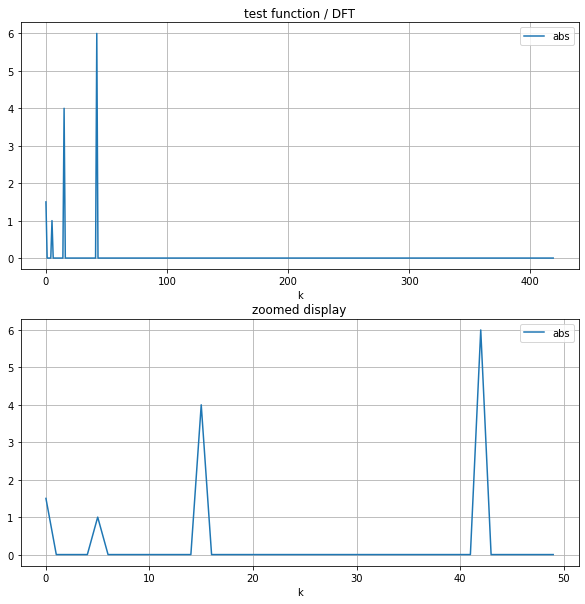

In [39]:
# graphics
fig2 = plt.figure(2, figsize=[10, 10])
ax_f21 = fig2.add_subplot(2, 1, 1)
ax_f21.plot(kv, np.abs(Gfft), label="abs")
ax_f21.legend(loc='upper right')
ax_f21.grid(True)
ax_f21.set_xlabel('k')
ax_f21.set_title('test function / DFT')

ax_f22 = fig2.add_subplot(2, 1, 2)
ax_f22.plot(kv[0:50], np.abs(Gfft[0:50]), label="abs")
ax_f22.legend(loc='upper right')
ax_f22.grid(True)
ax_f22.set_xlabel('k')
ax_f22.set_title('zoomed display');

## Applying the Inverse DFT (IDFT)

The examples show how to use the inverse discrete Fourier transform to obtain the sequence from the Fourier coefficients $A_1, A_2, A_3$.

An array $S$ of length $N$ is initialised by zeros. The Fourier coefficients $A_1, A_2, A_3$ are then *plugged* into array $S$ at the corresponding frequency indices $m_1, m_2, m_3$.

Finally the inverser DFT is applied by calling function `ifft` and applying a correction factor $N$. The resulting series `gIFFT` is displayed.

A third subplot shows the absolute error of the original sequence and the sequence obtained from applying the inverse transform. The error show on a logarithmic scale is quite small.



In [44]:
S = np.zeros(N)
S[[0, m_1, m_2, m_3]] = np.array([A_0, A_1, A_2, A_3])

gIFFT = N*np.fft.ifft(S)

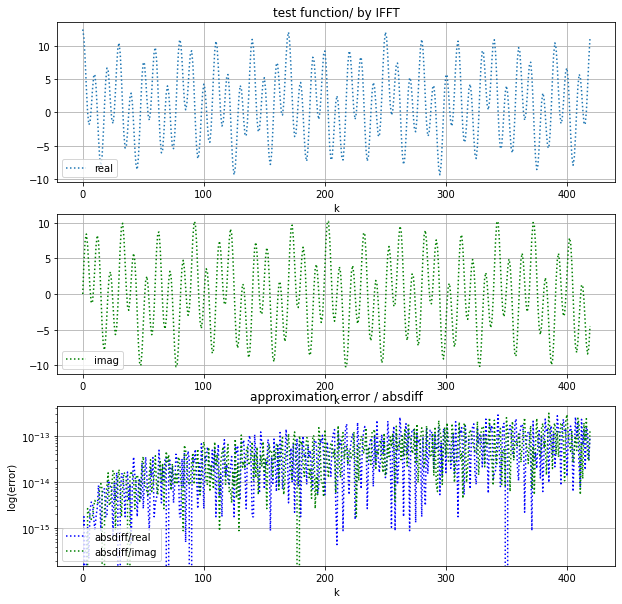

In [46]:
# graphics
fig3 = plt.figure(3, figsize=[10, 10])
ax_f31 = fig3.add_subplot(3, 1, 1)
ax_f31.plot(kv, gIFFT.real, linestyle=':', label="real")
ax_f31.legend(loc='lower left')
ax_f31.grid(True)
ax_f31.set_xlabel('k')
ax_f31.set_title('test function/ by IFFT')

ax_f32 = fig3.add_subplot(3, 1, 2)
ax_f32.plot(kv, gIFFT.imag, linestyle=':', color='g', label="imag")
ax_f32.legend(loc='lower left')
ax_f32.grid(True)
ax_f32.set_xlabel('k');

ax_f33 = fig3.add_subplot(3, 1, 3)
ax_f33.semilogy(kv, np.abs(gIFFT.real - gfunc.real), linestyle=':', color='b', label="absdiff/real")
ax_f33.semilogy(kv, np.abs(gIFFT.imag - gfunc.imag), linestyle=':', color='g', label="absdiff/imag")
ax_f33.legend(loc='lower left')
ax_f33.grid(True)
ax_f33.set_title('approximation error / absdiff')
ax_f33.set_xlabel('k')
ax_f33.set_ylabel('log(error)');

## Applying a time shift

By modifying the Fourier coefficents by a complex factor and applying the inverser DFT we obtain a time shifted series. 

The example below demontrates this for a time shift $\tau = 4.5 \cdot t_s$. 

For comparision the time shifted series has been computed using function `tstFunc` with a=4.5. The 3'rd subplot displays the absolute value of the difference. Again the error between direct computation and using inverse DFT is quite small due to rounding effects.

In [50]:
S_shift = np.zeros(N, dtype=np.complex64)

a= 4.5

# modifying the Fourier coefficients
A_1_shift = A_1 * np.exp(-2j*np.pi*m_1*a/N)
A_2_shift = A_2 * np.exp(-2j*np.pi*m_2*a/N)
A_3_shift = A_3 * np.exp(-2j*np.pi*m_3*a/N)

S_shift[[0, m_1, m_2, m_3]] = np.array([A_0, A_1_shift, A_2_shift, A_3_shift], dtype=np.complex64)

gIFFT_shift = N*np.fft.ifft(S_shift)

gfunc_shift, kv, N = tstFunc(A_0, A_1, A_2, A_3, m_1, m_2, m_3, osr, a)

**Note**

Plotting the time shifted series (real / imaginary parts) along with the unshifted series clearly shows the time shift.

More import however is the fact, that to applying a time shift to series amounts to modifying the Fourier coefficients by appropriately chosen factors. The inverse DFT then yields the samples of the time shifted series.

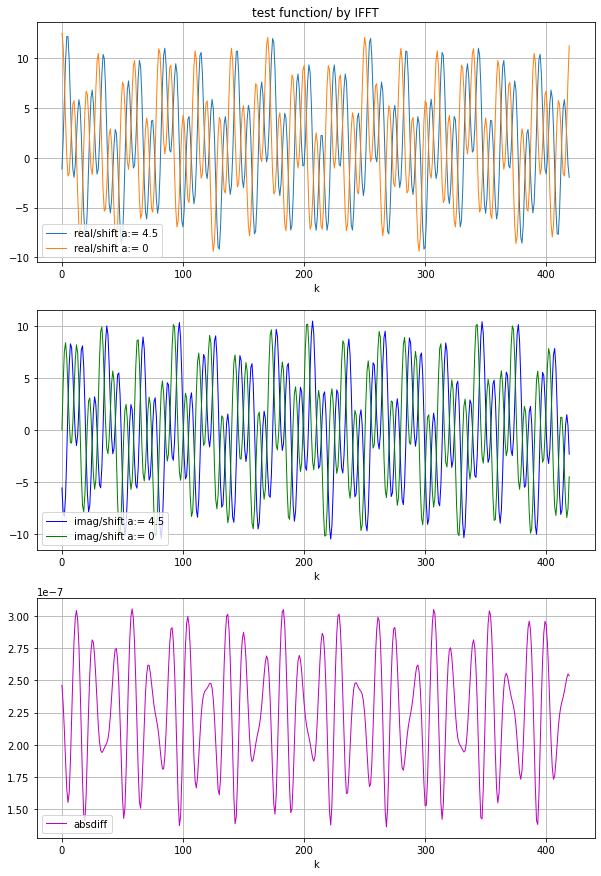

In [53]:
# graphics
fig4 = plt.figure(4, figsize=[10, 15])
ax_f41 = fig4.add_subplot(3, 1, 1)
ax_f41.plot(kv, gIFFT_shift.real, linewidth=1, label=f"real/shift a:= {a}")
ax_f41.plot(kv, gIFFT.real, linewidth=1, label=f"real/shift a:= 0")
ax_f41.legend(loc='lower left')
ax_f41.grid(True)
ax_f41.set_xlabel('k')
ax_f41.set_title('test function/ by IFFT')

ax_f42 = fig4.add_subplot(3, 1, 2)
ax_f42.plot(kv, gIFFT_shift.imag, linewidth=1, color='b', label=f"imag/shift a:= {a}")
ax_f42.plot(kv, gIFFT.imag, linewidth=1, color='g', label=f"imag/shift a:= 0")
ax_f42.legend(loc='lower left')
ax_f42.grid(True)
ax_f42.set_xlabel('k')

ax_f43 = fig4.add_subplot(3, 1, 3)
ax_f43.plot(kv, np.abs(gfunc_shift - gIFFT_shift), linewidth=1, color='m', label='absdiff')
ax_f43.legend(loc='lower left')
ax_f43.grid(True)
ax_f43.set_xlabel('k');
